# Automated Keyword Extraction from multiple Case Report Form (CRF) PDF files using Natural Language Processing (NLP)

In [8]:
import PyPDF2
import collections
import pandas as pd
import numpy as np 
import re
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer



In [10]:
filename = '/Users/divyathiyagu/Documents/nih-womenled-hacklaton/PROWL_PROWL2_eCRFs/A01_B38_LASIK Questionnaire_Annotated eCRFs.pdf'
pdf_file = open(filename, 'rb')

In [11]:
# Counting the frequency of words 
read_pdf = PyPDF2.PdfFileReader(pdf_file)
number_of_pages = read_pdf.getNumPages()
counter = collections.Counter(range(number_of_pages))
cvec = CountVectorizer()

word_list =[]
freq_list = []
for i in counter:
   page = read_pdf.getPage(i)
   page_content = page.extractText()
   tokenized_text_all=sent_tokenize(page_content)
   tokenized_word_all=word_tokenize(page_content)
   fdist_all = FreqDist(tokenized_word_all)
   token = RegexpTokenizer(r'[a-zA-Z0-9]+')
   cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
   text_counts= cv.fit_transform(tokenized_word_all)
   feature_name_all = cv.get_feature_names()
   freq_dist_all = FreqDist(feature_name_all)
   for word, frequency in freq_dist_all.most_common(50):
        #print(u'{} \t {}'.format(word, frequency))
        word_list.append(word)
        freq_list.append(frequency)
    

In [13]:
word_data = collections.Counter(word_list)
df = pd.DataFrame.from_dict(word_data, orient='index').reset_index()
df.columns=["Word", "Freq"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 2 columns):
Word    905 non-null object
Freq    905 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


Text(0, 0.5, 'Frequency of Words')

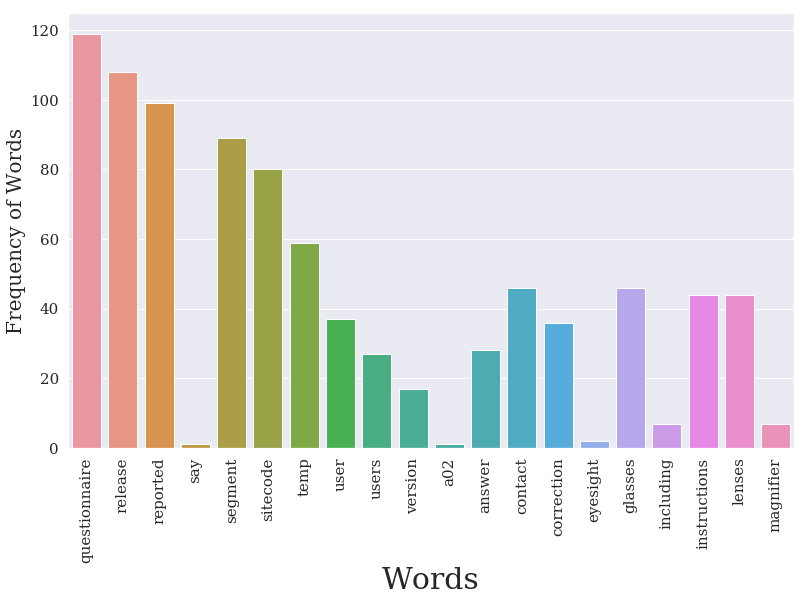

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)}, font='serif', font_scale=3)
g = sns.barplot(x="Word", y="Freq", data=df[40:60])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.tick_params(labelsize=15)
g.set_xlabel("Words",fontsize=30)
g.set_ylabel("Frequency of Words",fontsize=20)